In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(),download = True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=100, shuffle=False)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [6]:
class NeuralNet(nn.Module):
    """A Neural Network with a hidden layer"""
    def __init__(self, input_size,hidden_size,output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        return output

In [14]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


In [15]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.3936
Epoch [1/5], Step [200/600], Loss: 0.3363
Epoch [1/5], Step [300/600], Loss: 0.2376
Epoch [1/5], Step [400/600], Loss: 0.2413
Epoch [1/5], Step [500/600], Loss: 0.1739
Epoch [1/5], Step [600/600], Loss: 0.2084
Epoch [2/5], Step [100/600], Loss: 0.1560
Epoch [2/5], Step [200/600], Loss: 0.1561
Epoch [2/5], Step [300/600], Loss: 0.0383
Epoch [2/5], Step [400/600], Loss: 0.1251
Epoch [2/5], Step [500/600], Loss: 0.0544
Epoch [2/5], Step [600/600], Loss: 0.0838
Epoch [3/5], Step [100/600], Loss: 0.0517
Epoch [3/5], Step [200/600], Loss: 0.0421
Epoch [3/5], Step [300/600], Loss: 0.0498
Epoch [3/5], Step [400/600], Loss: 0.0332
Epoch [3/5], Step [500/600], Loss: 0.0798
Epoch [3/5], Step [600/600], Loss: 0.1522
Epoch [4/5], Step [100/600], Loss: 0.0506
Epoch [4/5], Step [200/600], Loss: 0.0733
Epoch [4/5], Step [300/600], Loss: 0.0275
Epoch [4/5], Step [400/600], Loss: 0.0468
Epoch [4/5], Step [500/600], Loss: 0.0698
Epoch [4/5], Step [600/600], Loss:

In [16]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.81 %


### Reading the original MNIST dataset in IDX format
From https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1

In [2]:
# Import the libraries
import struct as st
import numpy as np

In [6]:
# Open the IDX file in readable binary mode.
filename = {'images' : './data/MNIST_original_dataset/train-images-idx3-ubyte' ,
            'labels' : './data/MNIST_original_dataset/train-labels-idx1-ubyte'}
train_imagesfile = open(filename['images'],'rb')

In [7]:
# Fourth Step : Read the dimensions of the Image data-set
nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of column

In [8]:
# Fifth Step : Declare Image NumPy array (Optional, not required in this case)
images_array = np.zeros((nImg,nR,nC))

MemoryError: 

In [16]:
# Sixth Step : Reading the Image data
nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal, train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))

MemoryError: 

In [ ]:
images_array

In [11]:
### Reading the Kaggle Dataset
import pandas as pd
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [12]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

In [13]:
### Keyur Paralkar Notebook on Kaggle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
import pandas as pd

from PIL import Image

In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
PATH = './data/'


In [16]:
def return_data_label(fileName):
    df = pd.read_csv(filepath_or_buffer=PATH+fileName)
    if(fileName != 'test.csv'):
        label = np.array(df['label'])
        data = np.array(df[df.columns[1:]],dtype=np.float)
        new_data = np.reshape(a=data,newshape=(data.shape[0],28,28))
        return new_data, label
    else:
        data = np.array(df,dtype=np.float)
        new_data = np.reshape(a=data,newshape=(data.shape[0],28,28))
        return new_data

In [17]:
trainData, trainLabel = return_data_label('train.csv')
testData = return_data_label('test.csv')

In [18]:
#preprocessing the dataset
trainData = trainData / 255
trainData = (trainData - 0.5)/0.5

testData = testData / 255
testData = (testData - 0.5)/0.5

trainData = torch.from_numpy(trainData)
testData = torch.from_numpy(testData)
trainData, testData = trainData.type(torch.FloatTensor), testData.type(torch.FloatTensor)

In [19]:
trainData = trainData.unsqueeze_(dim=1)
testData = testData.unsqueeze_(dim=1)

In [20]:
trainDataset = torch.utils.data.TensorDataset(trainData,torch.from_numpy(trainLabel))
trainDataLoader = torch.utils.data.DataLoader(trainDataset,batch_size=100,shuffle=False, num_workers=4)

# testDataset = torch.utils.data.TensorDataset(testData)
testDataLoader = torch.utils.data.DataLoader(testData,batch_size=100,shuffle=False, num_workers = 4)

In [21]:
print("Training batches == \n",len(trainData))
print("Testing batches == \n",len(testData))


Training batches == 
 42000
Testing batches == 
 28000


In [23]:
#visualizing no. of examples of each type
def total_count(loader):
    totalClassCount = [0,0,0,0,0,0,0,0,0,0]

    for batch_id,(images,labels) in enumerate(loader):
        for label in labels:
            totalClassCount[int(label)] += 1
    return totalClassCount

Digit class =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 1.0, 'Train Set')

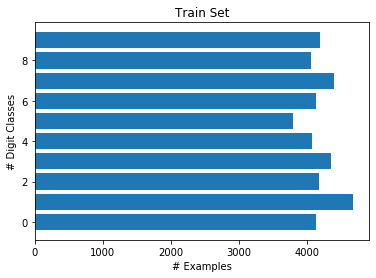

In [24]:
classes = [0,1,2,3,4,5,6,7,8,9]
print("Digit class = ",classes)
totalCount = total_count(trainDataLoader)

fig0, ax0 = plt.subplots()
ax0.barh(y=classes,width=totalCount)
ax0.set_xlabel('# Examples')
ax0.set_ylabel('# Digit Classes')
ax0.set_title('Train Set')

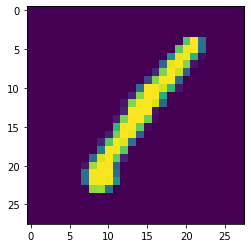

In [26]:
#Visualizing single digit:
temp = trainDataLoader.dataset[0][0].numpy()
temp = np.reshape(a=temp,newshape=(temp.shape[1],temp.shape[2]))
plt.imshow(temp)

In [27]:
#Creating LeNet5 nn class module
# conv2d => relu => maxpooling => conv2d => relu => maxpooling => fully connected layer(fc)1 
#=> fc2 => softmax output

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        
        self.fc1 = nn.Linear(1024,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        self.fc1Size = 0
        self.toKnowMaxPoolSize= False
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),1)
        
        if(self.toKnowMaxPoolSize == True):
            self.fc1Size = x.size()
            print(x.size())
            return
        #now lets reshape the matrix i.e. unrolling the matrix
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
n1 = Net()
#n1 = n1.cuda()
print(n1)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [34]:
#Creating function for training our NNs
def train_model(model,mode,decay,criterion,dataloader,optimizer,dictionary,num_epochs=30):
    #mode = True means model.train() and False is model.eval()
    #decay = True means decrease LR with no. of epochs 
    
    totalLoss = []
    totalLRs = []
    correct = 0
    total = 0
    LR = 0
    
    for epoch in range(num_epochs):
        if(decay == True):
            for param in optimizer.param_groups:
                LR = param['lr'] * (0.1**(epoch//7))
                param['lr'] = LR
            totalLRs.append(LR)
            
        print("Epoch = {}/{} ".format(epoch,num_epochs),end=" ")
        for batch_id,(image, label) in enumerate(dataloader):
            if(mode == True):
                optimizer.zero_grad()
                image = torch.autograd.Variable(image)
                label = torch.autograd.Variable(label)
                #image = image.cuda()
                #label = label.cuda()
            else:
                image = torch.autograd.Variable(image)
                #image = image.cuda()

            output = model.forward(image)
            
            if(mode == True):
                loss = criterion(output,label)

            _, predictated = torch.max(output.data,1)
            
            if(mode == True):
                correct += (predictated == label.data).sum()
                total += label.size(0)

                loss.backward()
                optimizer.step()

            del image,label
            
        #torch.cuda.empty_cache()
        #torch.empty_cache()
        print("Loss = {:.5f}".format(loss.data[0]))
        totalLoss.append(loss.data[0])
        
    dictionary['totalLoss'] = totalLoss
    dictionary['correct'] = correct
    dictionary['totalSize'] = total
    dictionary['totalLRs'] = totalLRs
    
    return model,dictionary

In [35]:
# forward => loss => backward => upadte weights
n1.toKnowMaxPoolSize = False   # To print the size of the last maxpool layer.
optimizer = torch.optim.SGD(n1.parameters(),lr=0.1)
#criterion = nn.CrossEntropyLoss().cuda()
criterion = nn.CrossEntropyLoss()

In [36]:
#Let's first find correct Learning Rate using Learning decay.

dictModel = {}
n1, dictModel = train_model(model=n1,mode=True,decay=True,criterion=criterion,dataloader=trainDataLoader,optimizer=optimizer,dictionary=dictModel,num_epochs=50)

Epoch = 0/50  

IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number

### Frank Lemuchahary Notebook
https://www.kaggle.com/franklemuchahary/mnist-digit-recognition-using-pytorch

In [38]:
#pytorch utility imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid

#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [39]:
#import external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import math
%matplotlib inline

In [41]:
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
print(device)

False
True
cpu


In [42]:
input_folder_path = "./data/"
train_df = pd.read_csv(input_folder_path+"train.csv")
test_df = pd.read_csv(input_folder_path+"test.csv")

In [43]:
train_labels = train_df['label'].values
train_images = (train_df.iloc[:,1:].values).astype('float32')
test_images = (test_df.iloc[:,:].values).astype('float32')

#Training and Validation Split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                     stratify=train_labels, random_state=123,
                                                                     test_size=0.20)

In [44]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)
val_images = val_images.reshape(val_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

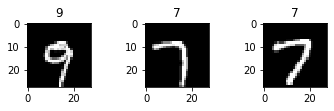

In [45]:
#train samples
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(train_images[i].squeeze(), cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i])

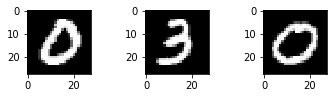

In [46]:
#test samples
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(test_images[i].squeeze(), cmap=plt.get_cmap('gray'))

In [47]:
#train
train_images_tensor = torch.tensor(train_images)/255.0
train_labels_tensor = torch.tensor(train_labels)
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

#val
val_images_tensor = torch.tensor(val_images)/255.0
val_labels_tensor = torch.tensor(val_labels)
val_tensor = TensorDataset(val_images_tensor, val_labels_tensor)

#test
test_images_tensor = torch.tensor(test_images)/255.0

In [48]:
train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, shuffle=True)
val_loader = DataLoader(val_tensor, batch_size=16, num_workers=2, shuffle=True)
test_loader = DataLoader(test_images_tensor, batch_size=16, num_workers=2, shuffle=False)

/home/gabriel/.local/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


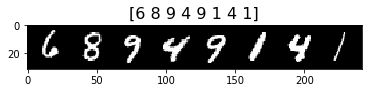

In [49]:
for batch_idx, (data, target) in enumerate(train_loader):
    img_grid = make_grid(data[0:8,].unsqueeze(1), nrow=8)
    img_target_labels = target[0:8,].numpy()
    break
    
plt.imshow(img_grid.numpy().transpose((1,2,0)))
plt.rcParams['figure.figsize'] = (10, 2)
plt.title(img_target_labels, size=16)
plt.show()

In [50]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) 
        )
        
        self.linear_block = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(128*7*7, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        x = self.conv_block(x)
        x = x.view(x.size(0), -1)
        x = self.linear_block(x)
        
        return x

In [51]:
conv_model = Net()
conv_model

Net(
  (conv_block): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_block): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=6272, out_features=128, bias=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace)
  

In [52]:
optimizer = optim.Adam(params=conv_model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()

exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

if torch.cuda.is_available():
    conv_model = conv_model.cuda()
    criterion = criterion.cuda()

In [62]:
def train_model(num_epoch):
    conv_model.train()
    exp_lr_scheduler.step()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.unsqueeze(1)
        data, target = data, target
        
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
            
        optimizer.zero_grad()
        output = conv_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if (batch_idx + 1)% 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                num_epoch, (batch_idx + 1) * len(data), len(train_loader.dataset),
                100. * (batch_idx + 1) / len(train_loader), loss.item()))
            
def evaluate(data_loader):
    conv_model.eval()
    loss = 0
    correct = 0
    
    for data, target in data_loader:
        data = data.unsqueeze(1)
        data, target = data, target
        
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = conv_model(data)
        
        loss += F.cross_entropy(output, target, size_average=False).item()

        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    loss /= len(data_loader.dataset)
        
    print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(
        loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))

In [63]:
num_epochs = 25

for n in range(num_epochs):
    train_model(n)
    evaluate(val_loader)

Train Epoch: 0 [1600/33600 (5%)]	Loss: 0.629091
Train Epoch: 0 [3200/33600 (10%)]	Loss: 0.542279
Train Epoch: 0 [4800/33600 (14%)]	Loss: 0.623876
Train Epoch: 0 [6400/33600 (19%)]	Loss: 0.733621
Train Epoch: 0 [8000/33600 (24%)]	Loss: 0.929409
Train Epoch: 0 [9600/33600 (29%)]	Loss: 0.537026
Train Epoch: 0 [11200/33600 (33%)]	Loss: 0.794428
Train Epoch: 0 [12800/33600 (38%)]	Loss: 0.496555
Train Epoch: 0 [14400/33600 (43%)]	Loss: 0.575411
Train Epoch: 0 [16000/33600 (48%)]	Loss: 0.566879
Train Epoch: 0 [17600/33600 (52%)]	Loss: 1.100626
Train Epoch: 0 [19200/33600 (57%)]	Loss: 0.618602
Train Epoch: 0 [20800/33600 (62%)]	Loss: 0.716567
Train Epoch: 0 [22400/33600 (67%)]	Loss: 0.617985
Train Epoch: 0 [24000/33600 (71%)]	Loss: 1.106295
Train Epoch: 0 [25600/33600 (76%)]	Loss: 0.564202
Train Epoch: 0 [27200/33600 (81%)]	Loss: 0.673608
Train Epoch: 0 [28800/33600 (86%)]	Loss: 0.598456
Train Epoch: 0 [30400/33600 (90%)]	Loss: 0.621114
Train Epoch: 0 [32000/33600 (95%)]	Loss: 0.773041
Train E

/home/gabriel/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Val Loss: 0.3093, Val Accuracy: 7860/8400 (93.000%)

Train Epoch: 1 [1600/33600 (5%)]	Loss: 0.369897
Train Epoch: 1 [3200/33600 (10%)]	Loss: 0.420205
Train Epoch: 1 [4800/33600 (14%)]	Loss: 0.820128
Train Epoch: 1 [6400/33600 (19%)]	Loss: 0.380925
Train Epoch: 1 [8000/33600 (24%)]	Loss: 0.600868
Train Epoch: 1 [9600/33600 (29%)]	Loss: 1.045408
Train Epoch: 1 [11200/33600 (33%)]	Loss: 0.778509
Train Epoch: 1 [12800/33600 (38%)]	Loss: 1.441444
Train Epoch: 1 [14400/33600 (43%)]	Loss: 0.577983
Train Epoch: 1 [16000/33600 (48%)]	Loss: 0.780622
Train Epoch: 1 [17600/33600 (52%)]	Loss: 0.578715
Train Epoch: 1 [19200/33600 (57%)]	Loss: 0.386868
Train Epoch: 1 [20800/33600 (62%)]	Loss: 0.965955
Train Epoch: 1 [22400/33600 (67%)]	Loss: 0.377912
Train Epoch: 1 [24000/33600 (71%)]	Loss: 0.731055
Train Epoch: 1 [25600/33600 (76%)]	Loss: 0.432986
Train Epoch: 1 [27200/33600 (81%)]	Loss: 0.771130
Train Epoch: 1 [28800/33600 (86%)]	Loss: 0.712663
Train Epoch: 1 [30400/33600 (90%)]	Loss: 0.49

In [57]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        # input channel = 1, output channel = 6, kernel_size = 5
        # input size = (32, 32), output size = (28, 28)
        self.conv1 = nn.Conv2d(1, 6, 5)
        # input channel = 6, output channel = 16, kernel_size = 5
        # input size = (14, 14), output size = (10, 10)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # input dim = 16*5*5, output dim = 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # input dim = 120, output dim = 84
        self.fc2 = nn.Linear(120, 84)
        # input dim = 84, output dim = 10
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # pool size = 2
        # input size = (28, 28), output size = (14, 14), output channel = 6
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # pool size = 2
        # input size = (10, 10), output size = (5, 5), output channel = 16
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        # input dim = 16*5*5, output dim = 120
        x = F.relu(self.fc1(x))
        # input dim = 120, output dim = 84
        x = F.relu(self.fc2(x))
        # input dim = 84, output dim = 10
        x = self.fc3(x)
        return x

In [58]:
model = LeNet()
model = model.double()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.003)

In [59]:
epochs = 15
train_losses, test_losses = [] ,[]
for epoch in range(epochs):
    running_loss = 0
    for images,labels in train_loader:
        train = Variable(images.view(-1,1,28,28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        output = model(train)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad(): #Turning off gradients to speed up
            model.eval()
            for images,labels in test_loader:
                
                test = Variable(images.view(-1,1,28,28))
                labels = Variable(labels)
                
                log_ps = model(test)
                test_loss += criterion(log_ps,labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()        
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.DoubleTensor) should be the same